# Regression Tree model on Heart Patient Data

## First let's understand about Regression Tree Model

### Is Regression Tree Supervised / unsupervised Machine learning model?
 Linear Regression Model is a supervised learning model where we predict a numerical value, with the help of a dataset. This model predicts a value of dependent(target) variable with the help of independent variable. 
 For Example - The price of car can be predicted by its fuel type, mileage, year of manufacture, accident claims etc.

### What is the aim of this Machine learning model ie what you are intending to do using this model?
With the help of this regression model, I am intending to train a model with the help of a dataset with a data from a website(CarDekho.com) which sells used vehicles so that in future I can predict the value of dependent variable such as Price with the help of different independent variables such as fuel type, mileage, year of manufacture, accident claims etc.

### Briefly discuss main concept behind this algorithm.
The main concept behind this algorithm is to find the relationship between explanatory variables(predictors) and target There can be a number of explanatory variables affecting the target variable. The value of target variable can be calculated using explanatory variables and this model represent the relationship between the two using a straight line. 


#### Lets run the model on the dataset!!

In [1]:
# Import required packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns

from dmba import plotDecisionTree, classificationSummary, regressionSummary

from dmba.metric import AIC_score

no display found. Using non-interactive Agg backend


In [2]:
# reading the data and adding it in the dataframe
data_df = pd.read_csv("/Users/mohitmehta/Desktop/BUSI_650_FinalAssignments/Datasets/heart_failure_clinical_records_dataset.csv")
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data_df.columns = [s.strip().replace(' ', '_') for s in data_df.columns] # all columns

In [4]:
# describing the datatypes of dataframe
data_df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Here, we can see more number of manual cars are being sold in the market either individually or through seller.

In [5]:
data_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
%matplotlib inline

<AxesSubplot:>

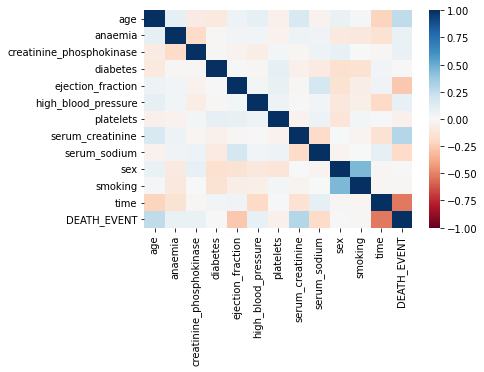

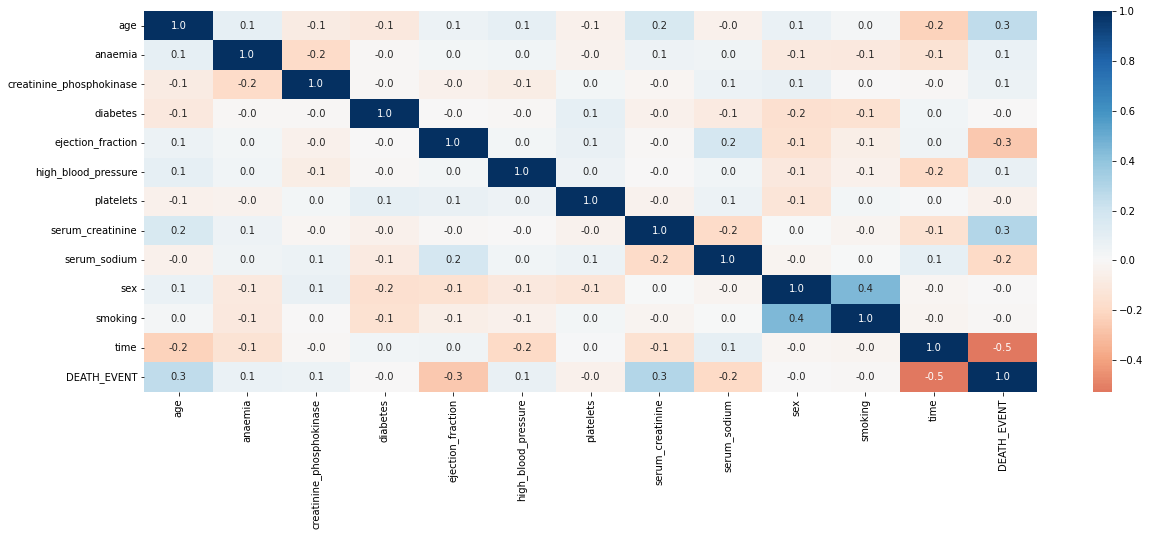

In [7]:
# drawing the correlation matrix to understand the correlation between the variables
corr = data_df.corr()
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")

# Include information about values (example demonstrate how to control the size of
# the plot
fig, ax = plt.subplots()
fig.set_size_inches(20, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

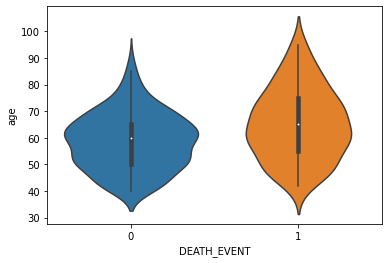

In [8]:
sns.violinplot(x='DEATH_EVENT',y='age',data=data_df,scale='area')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='time'>

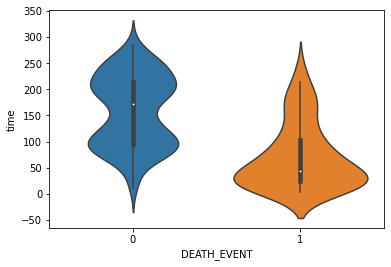

In [9]:
sns.violinplot(x='DEATH_EVENT',y='time',data=data_df,scale='area')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

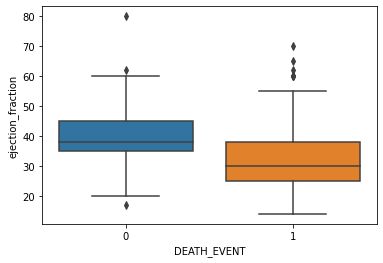

In [10]:
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',data=data_df)

In [11]:
data_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [12]:
X = data_df.drop(['DEATH_EVENT', 'diabetes', 'platelets', 'serum_creatinine'], axis='columns')
Y = data_df['DEATH_EVENT']

In [13]:
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.6, random_state=1)

In [14]:
train_Y.head()

94     0
140    1
222    0
148    1
152    0
Name: DEATH_EVENT, dtype: int64

In [15]:
train_X.shape,valid_X.shape,train_Y.shape,valid_Y.shape

((119, 9), (180, 9), (119,), (180,))

In [16]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_Y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.46820895298342496
Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.005, 'min_samples_split': 30}


In [22]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, ], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_Y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

Improved score:  0.43161307093128354
Improved parameters:  {'max_depth': 3, 'min_impurity_decrease': 0.008, 'min_samples_split': 14}


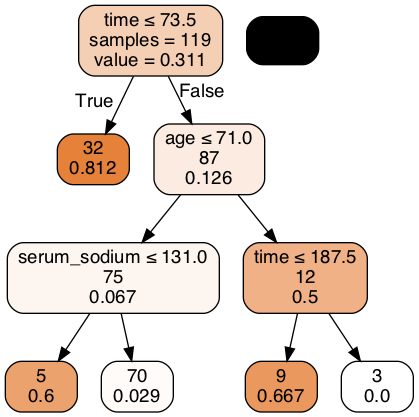

In [23]:
smallClassTree = DecisionTreeRegressor(max_depth=3, min_impurity_decrease=0.007,
                      min_samples_split=12)
smallClassTree.fit(train_X, train_Y)

plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [19]:
regTree = gridSearch.best_estimator_
print("Training Data")
regressionSummary(train_Y, regTree.predict(train_X))
print("\nValidation Data")
regressionSummary(valid_Y, regTree.predict(valid_X))

Training Data

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.2901
     Mean Absolute Error (MAE) : 0.1684

Validation Data

Regression statistics

               Mean Error (ME) : 0.0339
Root Mean Squared Error (RMSE) : 0.4054
     Mean Absolute Error (MAE) : 0.2463


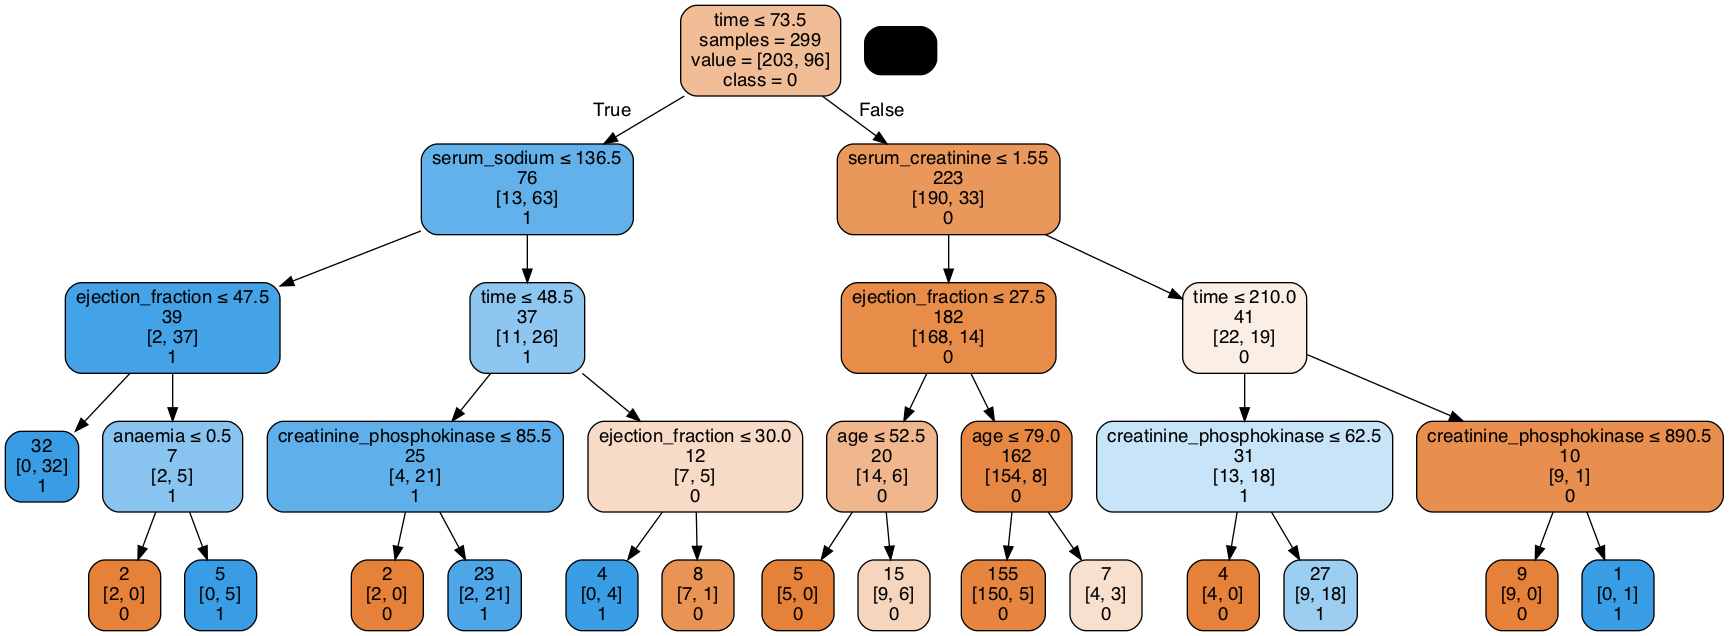

In [20]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=4)
classTree.fit(data_df.drop(columns=['DEATH_EVENT']), data_df['DEATH_EVENT'])
plotDecisionTree(classTree, feature_names=data_df.columns[:12], 
                 class_names=classTree.classes_)